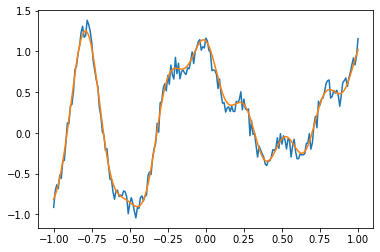

In [7]:
from scipy import signal
import matplotlib.pyplot as plt
import numpy as np

t = np.linspace(-1, 1, 201)
x = (np.sin(2*np.pi*0.75*t*(1-t) + 2.1) +
     0.1*np.sin(2*np.pi*1.25*t + 1) +
     0.18*np.cos(2*np.pi*3.85*t))
xn = x + np.random.randn(len(t)) * 0.08
plt.plot(t,xn)
plt.plot(t,x)

In [9]:
b, a = signal.butter(3, 0.05)

In [11]:
print(b)
print(a)

[0.00041655 0.00124964 0.00124964 0.00041655]
[ 1.         -2.6861574   2.41965511 -0.73016535]


In [14]:
zi = signal.lfilter_zi(b, a)
print(zi)
z, _ = signal.lfilter(b, a, xn, zi=zi*xn[0])
print(z)

[ 0.99958345 -1.68782358  0.73058189]
[-9.13291223e-01 -9.13208991e-01 -9.12708615e-01 -9.11237960e-01
 -9.08247111e-01 -9.03241575e-01 -8.95731296e-01 -8.85193984e-01
 -8.71059419e-01 -8.52641767e-01 -8.29102606e-01 -7.99639790e-01
 -7.63636927e-01 -7.20671799e-01 -6.70437524e-01 -6.12614270e-01
 -5.46950785e-01 -4.73404230e-01 -3.92115938e-01 -3.03359927e-01
 -2.07650751e-01 -1.05958501e-01  3.95385455e-04  1.10085276e-01
  2.21785812e-01  3.33929468e-01  4.44590607e-01  5.51512920e-01
  6.52306237e-01  7.44723781e-01  8.26761744e-01  8.96594293e-01
  9.52585011e-01  9.93415158e-01  1.01818663e+00  1.02645871e+00
  1.01824553e+00  9.93881010e-01  9.53883882e-01  8.99027303e-01
  8.30355814e-01  7.49167152e-01  6.57151939e-01  5.56357678e-01
  4.48929278e-01  3.36986486e-01  2.22639346e-01  1.07972597e-01
 -5.06595024e-03 -1.14895542e-01 -2.20415128e-01 -3.20744943e-01
 -4.14987509e-01 -5.02399832e-01 -5.82633665e-01 -6.55661703e-01
 -7.21507806e-01 -7.80098283e-01 -8.31264722e-01 -8.

In [17]:
z2, _ = signal.lfilter(b, a, z, zi=zi*z[0])

In [15]:
y = signal.filtfilt(b, a, xn)

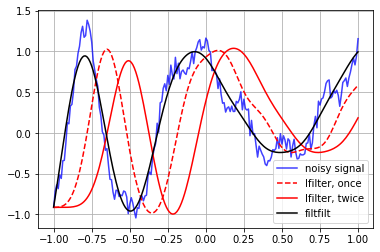

In [18]:
plt.figure
plt.plot(t, xn, 'b', alpha=0.75)
plt.plot(t, z, 'r--', t, z2, 'r', t, y, 'k')
plt.legend(('noisy signal', 'lfilter, once', 'lfilter, twice',
            'filtfilt'), loc='best')
plt.grid(True)
plt.show()

In [19]:
10

10

In [20]:
_

array([ 0.21879946, -0.33556373,  0.13483395])

In [22]:
x, _, y = (1, 2, 3)
print(x)
print(y)

1
3


In [23]:
_

2

In [24]:
for _ in range(10):     
    print(_)

0
1
2
3
4
5
6
7
8
9


In [25]:
from scipy import signal
import matplotlib.pyplot as plt

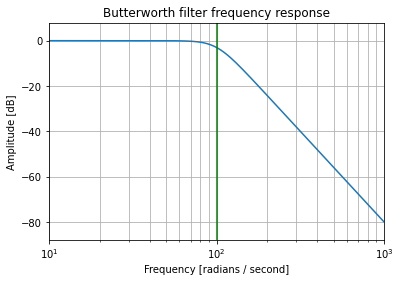

In [26]:
b, a = signal.butter(4, 100, 'low', analog=True)
w, h = signal.freqs(b, a)
plt.semilogx(w, 20 * np.log10(abs(h)))
plt.title('Butterworth filter frequency response')
plt.xlabel('Frequency [radians / second]')
plt.ylabel('Amplitude [dB]')
plt.margins(0, 0.1)
plt.grid(which='both', axis='both')
plt.axvline(100, color='green') # cutoff frequency
plt.show()

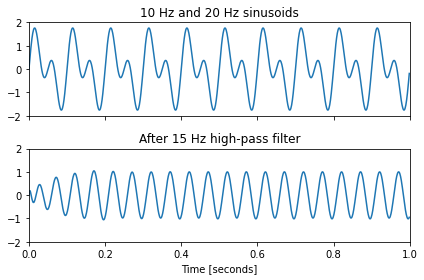

In [30]:
t = np.linspace(0, 1, 1000, False)  # 1 second
sig = np.sin(2*np.pi*10*t) + np.sin(2*np.pi*20*t)
fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True)
ax1.plot(t, sig)
ax1.set_title('10 Hz and 20 Hz sinusoids')
ax1.axis([0, 1, -2, 2])

sos = signal.butter(10, 15, 'hp', fs=1000, output='sos')
filtered = signal.sosfilt(sos, sig)
ax2.plot(t, filtered)
ax2.set_title('After 15 Hz high-pass filter')
ax2.axis([0, 1, -2, 2])
ax2.set_xlabel('Time [seconds]')
plt.tight_layout()
plt.show()


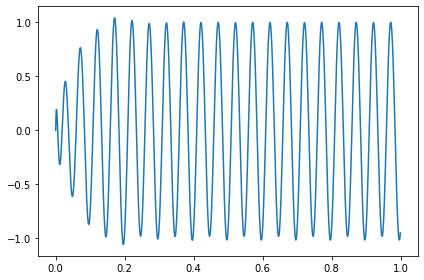

In [32]:
sos = signal.butter(10, 15, 'hp', fs=1000, output='sos')
filtered = signal.sosfilt(sos, sig)
plt.plot(t, filtered)
plt.tight_layout()
plt.show()
